In [6]:
# Paired t-Test
import numpy as np
from scipy import stats
np.random.seed(1234)
data = np.random.randn(10)+0.1
print(data)
data1 = np.random.randn(10)*5 # dummy data
print(data1)
data2 = data1 + data # same group-difference as "data"

[ 0.57143516 -1.09097569  1.53270697 -0.2126519  -0.62058873  0.98716294
  0.95958841 -0.5365235   0.11569637 -2.14268495]
[  5.75017862   4.95973011   4.76662064 -10.1062741   -1.67038683
   0.01059182   2.02726706   1.4454597    6.60579096  -7.73452777]


In [2]:
stats.ttest_1samp(data, 0)

Ttest_1sampResult(statistic=-0.12458492298731401, pvalue=0.9035904508547086)

In [3]:
stats.ttest_rel(data2, data1)

Ttest_relResult(statistic=-0.1245849229873135, pvalue=0.9035904508547089)

# a) Classical t-Test

In [7]:
import numpy as np
from scipy import stats
# Generate the data
np.random.seed(123)
race_1 = np.round(np.random.randn(20)*10+90) 
race_2 = np.round(np.random.randn(20)*10+85)
# t-test
(t, pVal) = stats.ttest_rel (race_1, race_2)
# Show the result
print('The probability that the two distributions are equal is {0:5.3f} .'.format(pVal))

The probability that the two distributions are equal is 0.033 .


# b) Statistical Modeling


In [8]:
import pandas as pd
import statsmodels.formula.api as sm
np.random.seed(123)
df = pd.DataFrame({'Race1': race_1, 'Race2':race_2})
result = sm.ols(formula='I(Race2-Race1) ~ 1', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       I(Race2 - Race1)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 16 Nov 2018   Prob (F-statistic):                nan
Time:                        12:14:52   Log-Likelihood:                -85.296
No. Observations:                  20   AIC:                             172.6
Df Residuals:                      19   BIC:                             173.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1000      3.950     -2.304      0.0

/Users/chengkai/miniconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


- The important line is the last but one, which produces the result. Thereby the function sm.ols (“ols” for “ordinary least square”) function from statsmodels tests the model which describes the difference between the results of Race1 and those of Race2 with only an offset, also called Intercept in the language of modeling. The results below show that the probability that this intercept is zero is only 0:033: the difference from zero is significant.

# 8.3 Comparison of Multiple Groups
# 8.3.1 Analysis of Variance (ANOVA)

#### Example: One-Way ANOVA
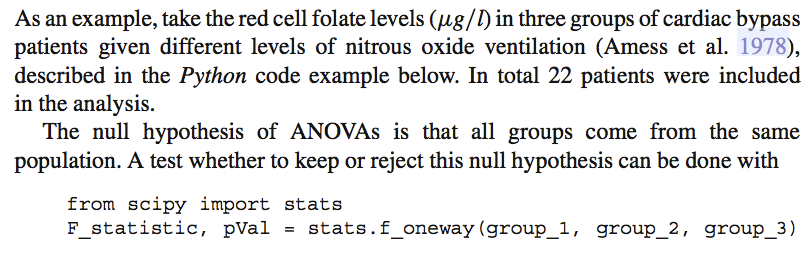

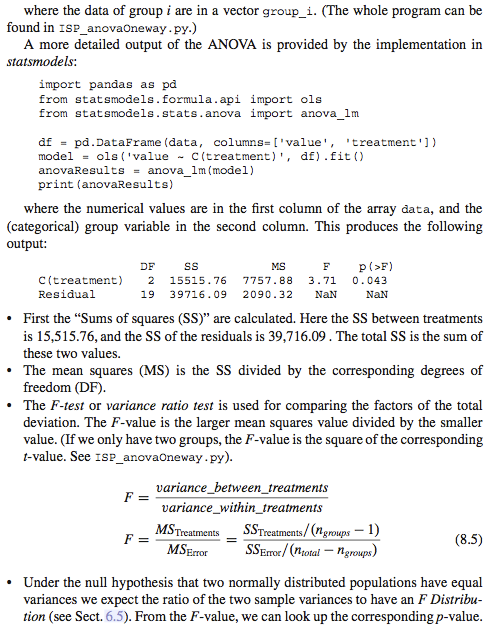

In [3]:
%pylab inline
%matplotlib inline
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


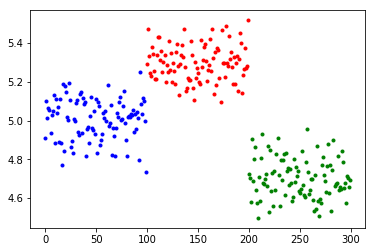

In [4]:
centers = [5, 5.3, 4.7]
std1 = 0.1
colors = 'brg'

data1 = []
for ii in range(3):
    data1.append(stats.norm(centers[ii], std1).rvs(100))
    plot(arange(len(data1[ii]))+ii*len(data1[0]), data1[ii], '.', color=colors[ii])

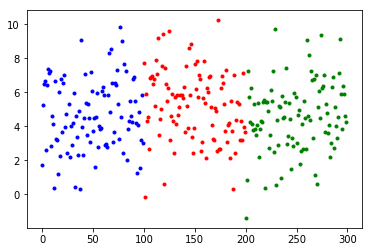

In [5]:
# Note: In both cases the means have the same difference, but the variance is much larger in data2!
std2 = 2
data2 = []
for ii in range(3):
    data2.append(stats.norm(centers[ii], std2).rvs(100))
    plot(arange(len(data1[ii]))+ii*len(data2[0]), data2[ii], '.', color=colors[ii])

- Get and sort sample data
- Twenty-two patients undergoing cardiac bypass surgery were randomized to one of three ventilation groups:
- Group I: Patients received 50% nitrous oxide and 50% oxygen mixture continuously for 24 h.
- Group II: Patients received a 50% nitrous oxide and 50% oxygen mixture only dirng the operation.
- Group III: Patients received no nitrous oxide but received 35-50% oxygen for 24 h.
- The data show red cell folate levels for the three groups after 24h' ventilation.

In [16]:
# Get the data
inFile = 'altman_910.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'

url = url_base + inFile
data = genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:,1]==1,0]
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]
print(group1)

[243. 251. 275. 291. 347. 354. 380. 392.]


#### Levene-test
- A Levene-test and/or a normality test should be made before applying a oneway ANOVA.

In [17]:
# check if the variances are equal with the "Levene"-test
(W,p) = stats.levene(group1, group2, group3)
if p<0.05:
    print('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p))

# One-way ANOVA

In [18]:
F_statistic, pVal = stats.f_oneway(group1, group2, group3)
print('The results from the one-way ANOVA, with the data from Altman 910: F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('One of the groups is significantly different.')

The results from the one-way ANOVA, with the data from Altman 910: F=3.7, p=0.04359
One of the groups is significantly different.


# Elegant alternative implementation, with pandas & statsmodels

In [19]:
df = pd.DataFrame(data, columns=['value', 'treatment'])    
# the "C" indicates categorical data
model = ols('value ~ C(treatment)', df).fit()
print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


# Two-way ANOVA

In [20]:
import numpy as np
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [23]:
inFile = 'altman_12_6.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Bring them in dataframe-format
df = pd.DataFrame(data, columns=['hs', 'fetus', 'observer'])
df[0:5]

,hs,fetus,observer
0,14.3,1.0,1.0
1,14.0,1.0,1.0
2,14.8,1.0,1.0
3,13.6,1.0,2.0
4,13.6,1.0,2.0


#### ANOVA with interaction

In [24]:
formula = 'hs ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = ols(formula, df).fit()
print(anova_lm(lm))

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN
